# Sinusoidal Gratings

In [6]:
import sys
import os
import numpy as np

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))

import fourieroptics as fo

## Create Grating

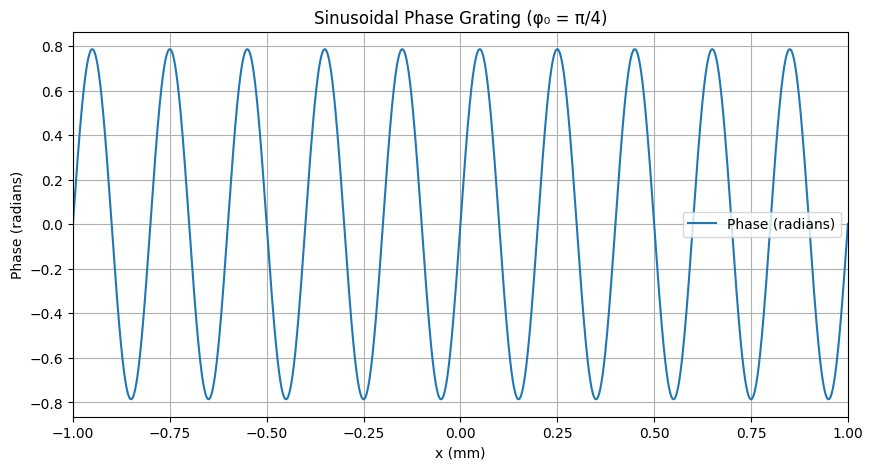

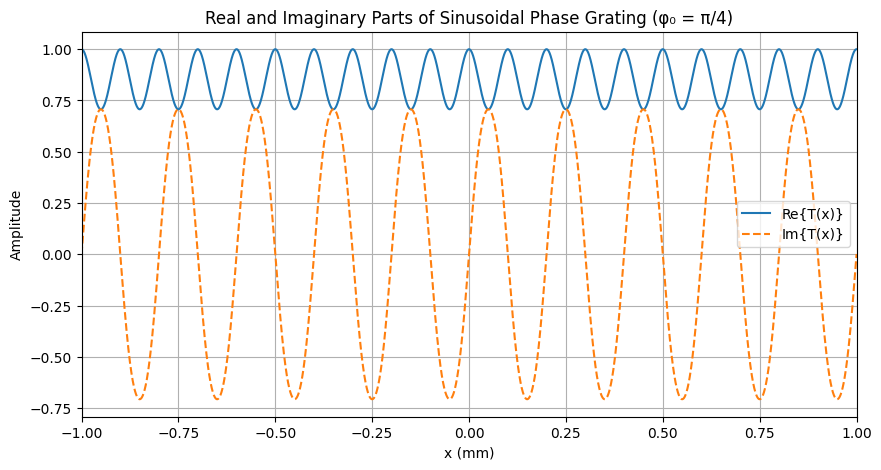

In [7]:
import matplotlib.pyplot as plt

# Grid
N = 200000
dx = 0.5e-7
x = fo.coords_1D(N, dx)
d = 200e-6

g = fo.sinusoidal_phase_grating_1D(x, d, phase_depth=np.pi/4)

plt.figure(figsize=(10,5))
plt.plot(x*1e3, np.angle(g), label="Phase (radians)")
plt.xlabel("x (mm)")
plt.ylabel("Phase (radians)")
plt.title("Sinusoidal Phase Grating (φ₀ = π/4)")
plt.xlim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x*1e3, np.real(g), label="Re{T(x)}")
plt.plot(x*1e3, np.imag(g), label="Im{T(x)}", linestyle='--')
plt.xlabel("x (mm)")
plt.ylabel("Amplitude")
plt.title("Real and Imaginary Parts of Sinusoidal Phase Grating (φ₀ = π/4)")
plt.xlim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()


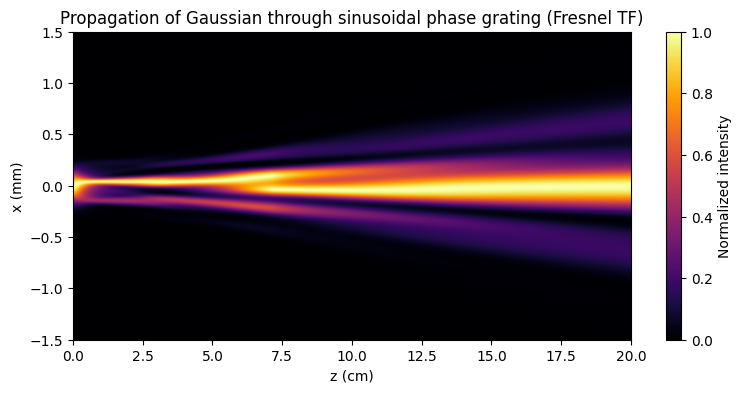

In [9]:
# Beam parameters
wavelength = 633e-9
z_max = 0.2        # max propagation distance = 20 cm
w0 = 200e-6        # waist of Gaussian

# Input Gaussian
E0 = fo.gaussian_beam_1D(x, w0)

# Multiply by grating mask
E_after = E0 * g

# Propagate with Fresnel using z_step
I_map, z_vals = fo.z_step_1D(E_after, x, fo.fresnel_tf_1D,
                             wavelength, z_range=z_max, n_points=300)

# Plot z-step intensity evolution
plt.figure(figsize=(9,4))
plt.imshow(I_map,
           extent=[z_vals[0]*100, z_vals[-1]*100, x[0]*1e3, x[-1]*1e3],
           aspect='auto', origin='lower', cmap='inferno')
plt.xlabel("z (cm)")
plt.ylabel("x (mm)")
plt.ylim(-1.50,1.50)
plt.title("Propagation of Gaussian through sinusoidal phase grating (Fresnel TF)")
plt.colorbar(label="Normalized intensity")
plt.show()